In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


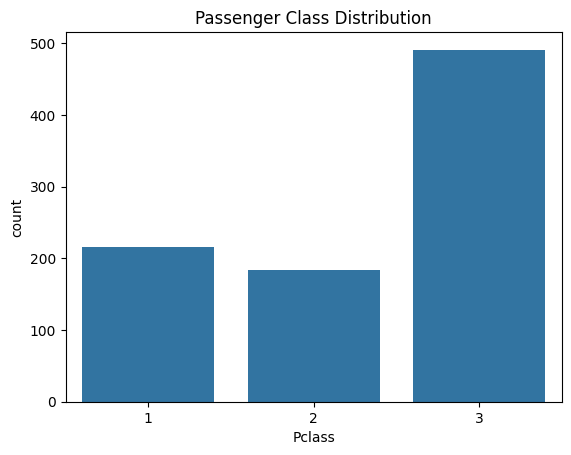

In [10]:
sns.countplot(data=train_df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()


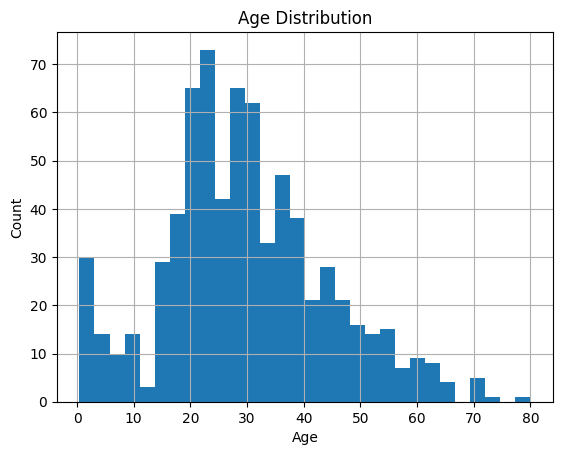

In [11]:
train_df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

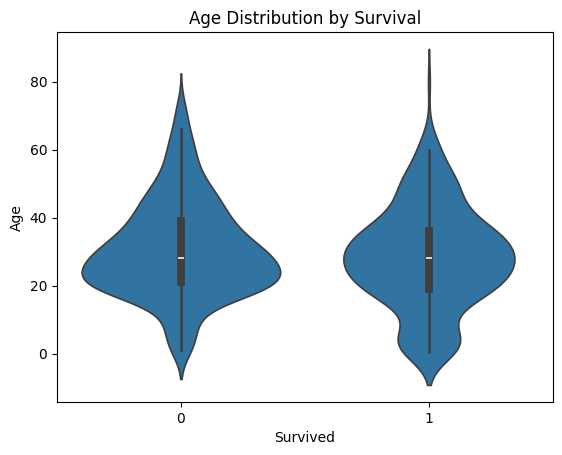

In [12]:
sns.violinplot(data=train_df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()

How many missing values in Age, Cabin, Embarked

In [ ]:
print(train_df[['Age', 'Cabin', 'Embarked']].isnull().sum())

Age         177
Cabin       687
Embarked      2
dtype: int64


Fill missing Age values with median age

In [14]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [15]:
print(train_df[['Age', 'Cabin', 'Embarked']].isnull().sum())

Age           0
Cabin       687
Embarked      2
dtype: int64


Fill missing Embarked values with mode (most frequent port)

In [17]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [18]:
print(train_df[['Age', 'Cabin', 'Embarked']].isnull().sum())

Age           0
Cabin       687
Embarked      0
dtype: int64


Cabin has many missing values — we'll drop it for now or create a feature indicating if Cabin info is known

In [19]:
train_df['Has_Cabin'] = train_df['Cabin'].notnull().astype(int)
train_df.drop('Cabin', axis=1, inplace=True)

In [21]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [22]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

Convert Sex to numeric

In [23]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

Convert Embarked to numeric categories

In [24]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,0,1


In [26]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)  # drop non-useful columns
y = train_df['Survived']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


ModuleNotFoundError: No module named 'sklearn'